# Ex 22

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

adult = pd.read_csv("~/Documents/Amar 1400 UT/4021_Fall 2023/Data Mining/adult.csv")
adult.info()

/home/p/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   race            25000 non-null  object
 2   sex             25000 non-null  object
 3   education-num   25000 non-null  int64 
 4   hours-per-week  25000 non-null  int64 
 5   marital-status  25000 non-null  object
 6   income          25000 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.3+ MB


In [2]:
for col in adult.columns:
    if adult[col].dtype == 'object':
        adult[col] = adult[col].astype("category") 

In [3]:
adult.dtypes

age                  int64
race              category
sex               category
education-num        int64
hours-per-week       int64
marital-status    category
income            category
dtype: object

In [4]:
adult["income"].cat.categories

Index(['<=50K.', '>50K.'], dtype='object')

In [5]:
adult["income"] = adult["income"].cat.reorder_categories(new_categories = ['<=50K.', '>50K.'], ordered=True)

In [6]:
adult["education-num"].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

In [7]:
adult["education-num"] = adult["education-num"].astype('category')
adult["education-num"] = adult["education-num"].cat.reorder_categories(
    ordered=True, new_categories=sorted(adult["education-num"].unique()))

# Ex 25

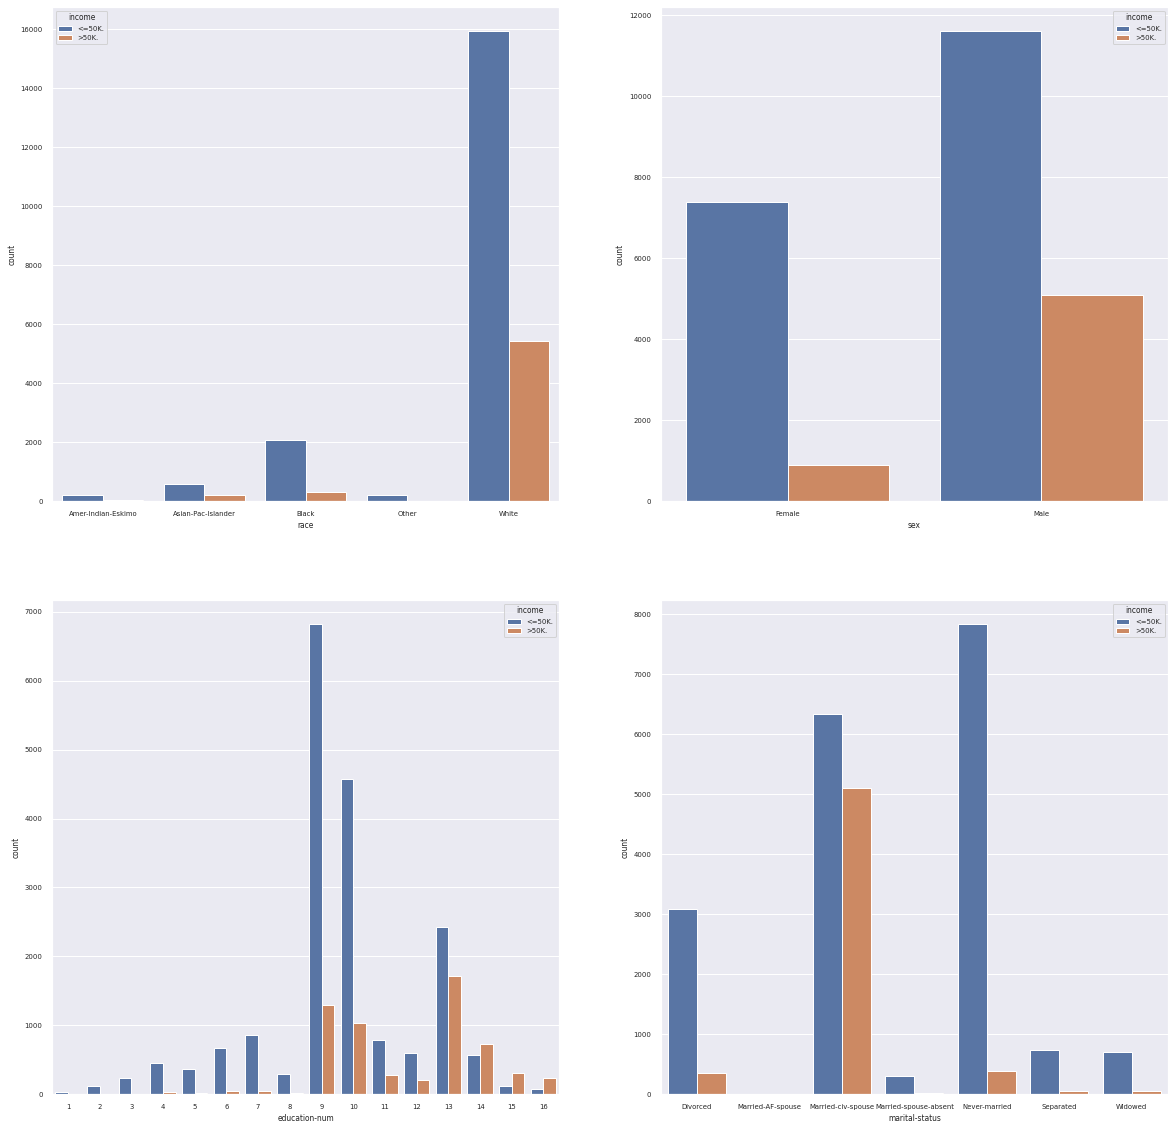

In [8]:
sns.set(font_scale=0.63)
fig, ax = plt.subplots(nrows =2, ncols=2, figsize=[20,20])
for i,col in enumerate(["race", "sex", "education-num", "marital-status"]):
    sns.countplot(
        data= adult,
        x = col,
        hue = "income",
        ax = ax[int(i/2), i%2]
    )

## (a)
Seems like income above 50k happens more when:
   - education num is more than 8
   - married-civ-spouse
   - male
   - white

## (b)
education-num and sex

# Ex 26

In [9]:
from itertools import combinations
for cols in combinations(["race", "sex", "education-num", "marital-status"],2):
    display(pd.crosstab(adult[cols[0]], adult[cols[1]], margins=True))

sex,Female,Male,All
race,,,
Amer-Indian-Eskimo,95,146,241
Asian-Pac-Islander,257,518,775
Black,1181,1198,2379
Other,90,124,214
White,6668,14723,21391
All,8291,16709,25000


education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,All
race,,,,,,,,,,,,,,,,,
Amer-Indian-Eskimo,0,1,2,9,3,13,11,2,92,65,14,6,16,3,2,2,241
Asian-Pac-Islander,4,4,10,8,9,9,15,6,180,150,24,20,224,61,31,20,775
Black,2,15,15,37,61,99,119,55,901,576,80,90,247,65,11,6,2379
Other,1,6,11,13,6,9,9,12,63,39,6,6,25,4,2,2,214
White,29,94,206,424,315,591,755,248,6884,4767,935,679,3628,1167,384,285,21391
All,36,120,244,491,394,721,909,323,8120,5597,1059,801,4140,1300,430,315,25000


marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,All
race,,,,,,,,
Amer-Indian-Eskimo,47,0,83,7,86,8,10,241
Asian-Pac-Islander,63,0,381,34,267,11,19,775
Black,358,1,634,47,1043,199,97,2379
Other,21,0,77,12,87,11,6,214
White,2946,15,10266,228,6742,557,637,21391
All,3435,16,11441,328,8225,786,769,25000


education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,All
sex,,,,,,,,,,,,,,,,,
Female,10,33,61,119,115,229,322,107,2671,2160,381,310,1235,408,67,63,8291
Male,26,87,183,372,279,492,587,216,5449,3437,678,491,2905,892,363,252,16709
All,36,120,244,491,394,721,909,323,8120,5597,1059,801,4140,1300,430,315,25000


marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,All
sex,,,,,,,,
Female,2062,11,1280,157,3657,478,646,8291
Male,1373,5,10161,171,4568,308,123,16709
All,3435,16,11441,328,8225,786,769,25000


marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,All
education-num,,,,,,,,
1,0,0,16,4,14,0,2,36
2,8,0,57,9,25,8,13,120
3,16,0,124,13,67,15,9,244
4,60,0,264,12,87,15,53,491
5,49,0,180,8,111,26,20,394
6,95,0,270,9,277,37,33,721
7,101,0,283,13,447,37,28,909
8,25,0,101,6,173,11,7,323
9,1268,10,3732,94,2375,312,329,8120


# Ex 28
race and education may be anomalous. since some values have zero or very little count.

# Ex 30

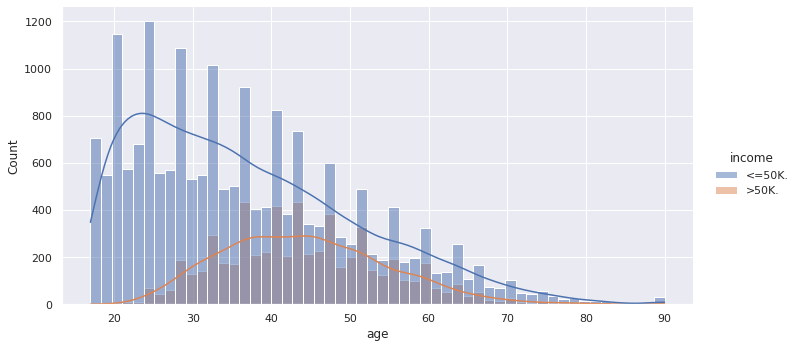

In [10]:
sns.set(font_scale=1)
sns.displot(adult,x = "age", hue="income", aspect=2, kde= True)

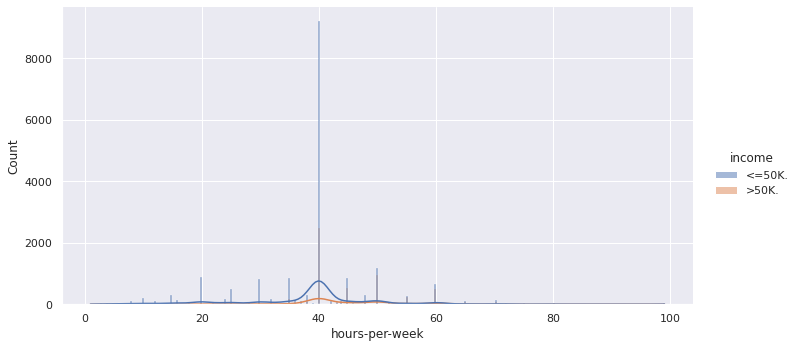

In [11]:
sns.displot(adult,x = "hours-per-week", hue="income", aspect=2, kde=True)

if we allow education num to be int64:

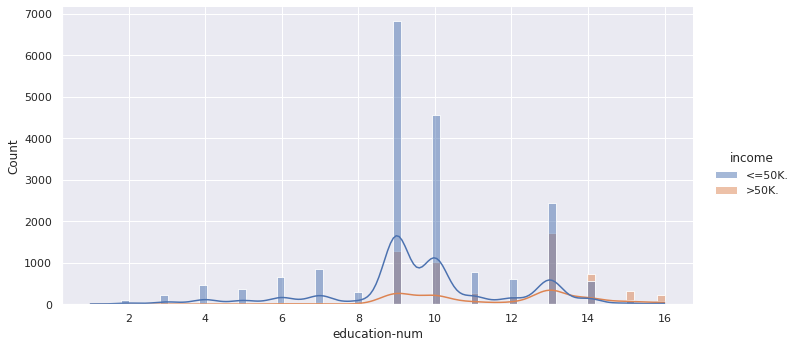

In [12]:
adult["education-num"] = adult["education-num"].astype("int64")
sns.displot(adult,x = "education-num", hue="income", aspect=2, kde=True)

### (a)
age no but with more workhours and edu num the >50 increases 

### (b)
workhours and edu num

# Ex 32
education above 8, working hours above 40

# Ex 33

#### Binnig with equal lenght

In [13]:
adult = pd.read_csv("~/Documents/Amar 1400 UT/4021_Fall 2023/Data Mining/adult.csv")



SyntaxError: '(' was never closed (683816865.py, line 3)

# Ex 34